In [1]:
import pandas as pd
import datetime 
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from functools import reduce

%matplotlib inline

In [2]:
carbon = pd.read_csv('../data/co2_vol_massa_prepped.csv')
#source: US Dept. of Energy/Energy Information Administration - https://www.eia.gov/environment/emissions/co2_vol_mass.php

In [3]:
carbon.head()

,Type of fuel:,Pounds CO2,lbs co2 unit of measure,Kilograms CO2,kilo co2 unit of measure,Pounds CO2 per million btu,Kilograms CO2 per million btu
0,Propane,12.61,gallon,5.72,gallon,138.63,62.88
1,Diesel and Home Heating Fuel (Distillate Fuel ...,22.46,gallon,10.19,gallon,163.45,74.14
2,Kerosene,21.78,gallon,9.88,gallon,161.35,73.19
3,Coal (All types),"4,027.93",short ton,"1,827.04",short ton,211.06,95.74
4,Natural Gas,121.31,thousand cubic feet,55.03,thousand cubic feet,116.65,52.91


Trucks : Diesel fuel (source: https://fleetnetamerica.com/blog/post/surprising-facts-about-semi-trucks)
Trains: Diesel fuel (source: https://www.dieselforum.org/about-clean-diesel/rail#:~:text=Freight%20train%20engines%20rely%20almost%20exclusively%20on%20diesel.,1940%20%2D%20most%20for%20passenger%20service.)
Planes: Jet fuel (source: https://ijet.aero/ijet-blog/different-types-aviation-fuel-jet-fuel)
Ships: Heavy fuel oil/bunker fuel (source: https://spectrum.ieee.org/the-struggle-to-make-dieselguzzling-cargo-ships-greener)

Note: ship oil is not in my dataset.  Found: https://www.engineeringtoolbox.com/co2-emission-fuels-d_1085.html

Heavy fuel oil - 25.5 lbs CO2 per gallon of fuel

I was curious how a 6lb gallon of gasoline managed to produce 18lbs of co2.  Learned!
gasoline does not contain oxygen, but it does contain carbon.
carbon and oxygen are close to the same weight (oxygen actually a little heavier)

when gas burns and releases carbon, it combines with oxygen in the air
at twice the volume (2-o for 1-c), basically tripling the weight of the carbon when it's released
ergo - the co2 is 3x the weight of the original carbon source

and some carbon sources are more or less dense in carbon molecules than gasoline.  ergo why some fuels for the same volume produce more or less co2

In [4]:
#simplifying df for visualization

carbon_edited = carbon[['Type of fuel: ','Pounds CO2 ','lbs co2 unit of measure']]

In [5]:
carbon_edited

,Type of fuel:,Pounds CO2,lbs co2 unit of measure
0,Propane,12.61,gallon
1,Diesel and Home Heating Fuel (Distillate Fuel ...,22.46,gallon
2,Kerosene,21.78,gallon
3,Coal (All types),"4,027.93",short ton
4,Natural Gas,121.31,thousand cubic feet
5,Gasoline,18.74,gallon
6,Residual Heating Fuel (Businesses only),24.78,gallon
7,Jet Fuel,21.5,gallon
8,Aviation Gasoline,18.32,gallon
9,Petroleum coke,32.87,gallon


In [6]:
#only interested in fuels needed for my project.  truck and train fuel = diesel.  jet fuel.  ship heavy fuel oil.

carbon_edited = carbon_edited[carbon_edited['Type of fuel: '].isin(['Diesel and Home Heating Fuel (Distillate Fuel Oil)','Jet Fuel'])]

In [7]:
carbon_edited

,Type of fuel:,Pounds CO2,lbs co2 unit of measure
1,Diesel and Home Heating Fuel (Distillate Fuel ...,22.46,gallon
7,Jet Fuel,21.5,gallon


In [8]:
#adding my ship fuel data to my df

ship_added = {'Type of fuel: ':'Heavy Fuel Oil', 'Pounds CO2 ': 25.5, 'lbs co2 unit of measure': 'gallon'}
carbon_edited = carbon_edited.append(ship_added, ignore_index = True)

In [9]:
carbon_edited

,Type of fuel:,Pounds CO2,lbs co2 unit of measure
0,Diesel and Home Heating Fuel (Distillate Fuel ...,22.46,gallon
1,Jet Fuel,21.5,gallon
2,Heavy Fuel Oil,25.5,gallon


In [10]:
#renaming for visualizatoin clarity

carbon_edited['Type of fuel: '] = carbon_edited['Type of fuel: '].replace({'Diesel and Home Heating Fuel (Distillate Fuel Oil)': 'Diesel'})

In [11]:
carbon_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Type of fuel:            3 non-null      object
 1   Pounds CO2               3 non-null      object
 2   lbs co2 unit of measure  3 non-null      object
dtypes: object(3)
memory usage: 200.0+ bytes


In [12]:
carbon_edited['Pounds CO2 '] = pd.to_numeric(carbon_edited['Pounds CO2 '])

In [22]:
#to match my other graphs examining fuel, I want the three types in the same order - jet, heavy, diesel

carbon_edited['Type of fuel: '] = carbon_edited['Type of fuel: '].replace({
    'Diesel': '3Diesel',
    'Jet Fuel': '1Jet Fuel',
    'Heavy Fuel Oil':'2Heavy Fuel Oil'
})
carbon_edited = carbon_edited.sort_values("Type of fuel: ")

carbon_edited

,Type of fuel:,Pounds CO2,lbs co2 unit of measure
1,1Jet Fuel,21.50,gallon
2,2Heavy Fuel Oil,25.50,gallon
0,3Diesel,22.46,gallon


In [23]:
carbon_edited.reset_index(drop=True)

,Type of fuel:,Pounds CO2,lbs co2 unit of measure
0,1Jet Fuel,21.50,gallon
1,2Heavy Fuel Oil,25.50,gallon
2,3Diesel,22.46,gallon


In [26]:
carbon_edited['Type of fuel: '] = carbon_edited['Type of fuel: '].replace({
    '3Diesel': 'Diesel',
    '1Jet Fuel': 'Jet Fuel',
    '2Heavy Fuel Oil':'Heavy Fuel Oil'
})
carbon_edited

,Type of fuel:,Pounds CO2,lbs co2 unit of measure
1,Jet Fuel,21.50,gallon
2,Heavy Fuel Oil,25.50,gallon
0,Diesel,22.46,gallon


In [27]:
#setting the size of my visuals
sns.set(rc={"figure.figsize":(13, 8)},font_scale=1.5, style='darkgrid')

In [28]:
#to show the values of the data on my graph:

def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

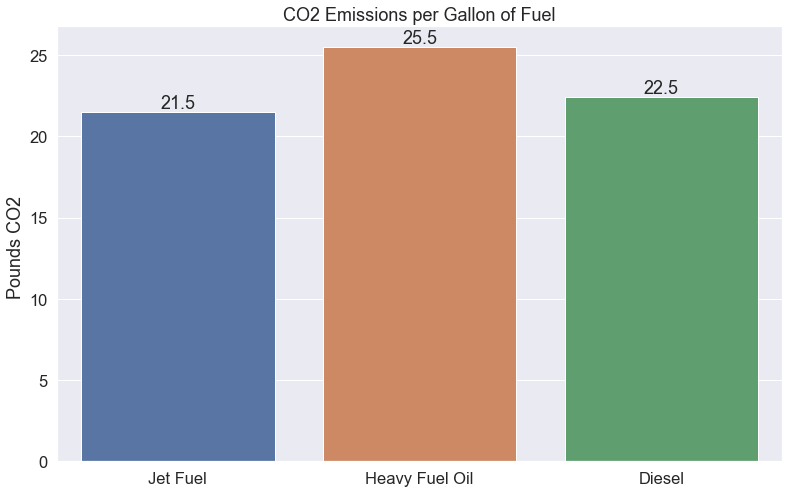

In [29]:
#sns.set_palette("mako")
a = sns.barplot(data=carbon_edited, x='Type of fuel: ', y='Pounds CO2 ')
a.set(xlabel = '')
a.set_title('CO2 Emissions per Gallon of Fuel')

show_values(a)

Putting it together - 1000 miles

how many lbs of CO2 are released for every 1000 miles traveled?

In [17]:
carbon_edited

,Type of fuel:,Pounds CO2,lbs co2 unit of measure
0,Diesel,22.46,gallon
1,Jet Fuel,21.50,gallon
2,Heavy Fuel Oil,25.50,gallon


# might be easier to move this data over to my mpg notebook rather than try to figure out how to move it over here.